# Import modules

In [1]:
import sys
sys.path.append('../..')
from facelib import facerec
from matplotlib import pyplot as plt
import cv2


# Prepare detectors

In [2]:
face_detector = facerec.SSDFaceDetector(tpu=True)
landmark_detector = facerec.LandmarkDetector()
feature_extractor = facerec.FeatureExtractor()


# Import modules

In [1]:
import sys
sys.path.append('../..')
from facelib import facerec
from matplotlib import pyplot as plt
import cv2


# Prepare detectors

In [2]:
face_detector = facerec.SSDFaceDetector()
landmark_detector = facerec.LandmarkDetector()
feature_extractor = facerec.FeatureExtractor()


# Prepare pipeline

In [3]:
pipeline = facerec.Pipeline(face_detector, landmark_detector, feature_extractor)


# Load sample image

In [4]:
path_img = './lotr_cast.png'
img = cv2.imread(path_img)[...,::-1]


# Run pipeline

In [5]:
bboxes, landmarks, features = pipeline.predict(img)


# Plot prediction

In [6]:
def normalize(array):
    """Normalize prediction for opencv."""
    array = (array * img.shape[:2]).astype('int32')[...,::-1]
    return array

img_plot = img.copy()

for b in normalize(bboxes):
    cv2.rectangle(img_plot, tuple(b[0]), tuple(b[1]), (0,255,0))
for lm in normalize(landmarks):
    for coor in lm:
        cv2.circle(img_plot, tuple(coor), 1, (255,0,255), 2)


# Show plotted image

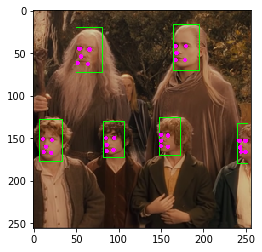

In [7]:
plt.imshow(img_plot)
